# 🚗 Hierarchical Clustering for Vehicle Grouping

This notebook demonstrates hierarchical clustering for vehicle classification using:
- **Agglomerative Clustering** (bottom-up)
- **Divisive Clustering** (top-down concept)
- **Linkage Methods**: Single, Complete, Average
- **Dendrogram Visualization**

## 🎯 Goal: Group vehicles based on their characteristics

## 1. Import Libraries & Create Dataset

In [11]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [12]:
# Create realistic vehicle dataset with distinct categories
np.random.seed(42)
n_vehicles = 120

# Define 4 realistic vehicle categories
# Category 1: Compact Cars (30 vehicles)
compact_cars = {
    'Engine_Size': np.random.normal(1.4, 0.3, 30),
    'Horsepower': np.random.normal(120, 20, 30),
    'Weight': np.random.normal(1300, 100, 30),
    'Fuel_Efficiency': np.random.normal(18, 3, 30),
    'Price': np.random.normal(22000, 4000, 30),
    'Length': np.random.normal(4.2, 0.3, 30),
    'Width': np.random.normal(1.7, 0.1, 30)
}

# Category 2: Mid-size Sedans (30 vehicles)
sedans = {
    'Engine_Size': np.random.normal(2.2, 0.4, 30),
    'Horsepower': np.random.normal(180, 30, 30),
    'Weight': np.random.normal(1600, 150, 30),
    'Fuel_Efficiency': np.random.normal(12, 2, 30),
    'Price': np.random.normal(35000, 6000, 30),
    'Length': np.random.normal(4.8, 0.2, 30),
    'Width': np.random.normal(1.8, 0.1, 30)
}

# Category 3: SUVs (30 vehicles)
suvs = {
    'Engine_Size': np.random.normal(3.2, 0.5, 30),
    'Horsepower': np.random.normal(280, 40, 30),
    'Weight': np.random.normal(2200, 200, 30),
    'Fuel_Efficiency': np.random.normal(9, 1.5, 30),
    'Price': np.random.normal(48000, 8000, 30),
    'Length': np.random.normal(5.1, 0.3, 30),
    'Width': np.random.normal(1.9, 0.1, 30)
}

# Category 4: Luxury/Sports Cars (30 vehicles)
luxury_sports = {
    'Engine_Size': np.random.normal(4.2, 0.8, 30),
    'Horsepower': np.random.normal(400, 60, 30),
    'Weight': np.random.normal(1800, 200, 30),
    'Fuel_Efficiency': np.random.normal(8, 1, 30),
    'Price': np.random.normal(75000, 15000, 30),
    'Length': np.random.normal(4.6, 0.4, 30),
    'Width': np.random.normal(1.85, 0.15, 30)
}

# Combine all categories
data = {
    'Engine_Size': np.concatenate([compact_cars['Engine_Size'], sedans['Engine_Size'], 
                                  suvs['Engine_Size'], luxury_sports['Engine_Size']]),
    'Horsepower': np.concatenate([compact_cars['Horsepower'], sedans['Horsepower'],
                                 suvs['Horsepower'], luxury_sports['Horsepower']]),
    'Weight': np.concatenate([compact_cars['Weight'], sedans['Weight'],
                             suvs['Weight'], luxury_sports['Weight']]),
    'Fuel_Efficiency': np.concatenate([compact_cars['Fuel_Efficiency'], sedans['Fuel_Efficiency'],
                                      suvs['Fuel_Efficiency'], luxury_sports['Fuel_Efficiency']]),
    'Price': np.concatenate([compact_cars['Price'], sedans['Price'],
                            suvs['Price'], luxury_sports['Price']]),
    'Length': np.concatenate([compact_cars['Length'], sedans['Length'],
                             suvs['Length'], luxury_sports['Length']]),
    'Width': np.concatenate([compact_cars['Width'], sedans['Width'],
                            suvs['Width'], luxury_sports['Width']])
}

# Create DataFrame
df = pd.DataFrame(data)

# Ensure realistic ranges
df['Engine_Size'] = np.clip(df['Engine_Size'], 1.0, 6.0)
df['Horsepower'] = np.clip(df['Horsepower'], 100, 600).astype(int)
df['Weight'] = np.clip(df['Weight'], 1000, 3000).astype(int)
df['Fuel_Efficiency'] = np.clip(df['Fuel_Efficiency'], 5, 25)
df['Price'] = np.clip(df['Price'], 15000, 120000).astype(int)
df['Length'] = np.clip(df['Length'], 3.5, 6.0)
df['Width'] = np.clip(df['Width'], 1.5, 2.2)

# Shuffle the data to mix categories
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df['Vehicle_ID'] = [f'Vehicle_{i+1:03d}' for i in range(len(df))]

print("🚗 Vehicle Dataset Created:")
print(f"  Vehicles: {len(df)}")
print(f"  Features: {len(df.columns)-1}")
display(df.head())
display(df.describe())

🚗 Vehicle Dataset Created:
  Vehicles: 120
  Features: 7


,Engine_Size,Horsepower,Weight,Fuel_Efficiency,Price,Length,Width,Vehicle_ID
0,2.011227,134,1919,14.610958,32173,5.230636,1.754993,Vehicle_001
1,1.768902,158,1688,11.379466,26555,4.836668,1.785762,Vehicle_002
2,1.329754,136,1381,16.823676,24347,4.287922,1.677654,Vehicle_003
3,2.453568,142,1496,9.571623,28984,4.830079,1.725151,Vehicle_004
4,1.054702,103,1391,17.895865,17052,4.203901,1.751504,Vehicle_005


,Engine_Size,Horsepower,Weight,Fuel_Efficiency,Price,Length,Width
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.707147,241.966667,1717.050000,11.695014,45135.500000,4.716423,1.828826
std,1.180750,112.881877,350.228181,4.394183,23083.331276,0.407709,0.142879
min,1.000000,100.000000,1038.000000,6.159126,15570.000000,3.842609,1.548515
25%,1.734234,139.750000,1429.750000,8.161860,28052.000000,4.423424,1.732411
50%,2.525461,230.000000,1694.500000,10.130084,38219.500000,4.764385,1.807242
75%,3.546962,327.500000,1986.000000,14.360658,58089.750000,4.990527,1.927825
max,6.000000,505.000000,2581.000000,25.000000,114485.000000,5.781208,2.194835


## 2. Data Preprocessing

In [13]:
# Prepare data for clustering
numeric_features = ['Engine_Size', 'Horsepower', 'Weight', 'Fuel_Efficiency', 'Price', 'Length', 'Width']
X = df[numeric_features].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("🔧 Data Preprocessing:")
print(f"  Shape: {X_scaled.shape}")
print(f"  Features: {numeric_features}")
print(f"  Scaled range: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")

# Show data distribution to verify realistic vehicle categories
print("\n📊 Vehicle Characteristics Overview:")
print(f"  Engine Size: {df['Engine_Size'].min():.1f}L - {df['Engine_Size'].max():.1f}L")
print(f"  Horsepower: {df['Horsepower'].min()} - {df['Horsepower'].max()} HP")
print(f"  Weight: {df['Weight'].min()} - {df['Weight'].max()} kg")
print(f"  Fuel Efficiency: {df['Fuel_Efficiency'].min():.1f} - {df['Fuel_Efficiency'].max():.1f} km/L")
print(f"  Price: ${df['Price'].min():,} - ${df['Price'].max():,}")

🔧 Data Preprocessing:
  Shape: (120, 7)
  Features: ['Engine_Size', 'Horsepower', 'Weight', 'Fuel_Efficiency', 'Price', 'Length', 'Width']
  Scaled range: [-2.15, 3.04]

📊 Vehicle Characteristics Overview:
  Engine Size: 1.0L - 6.0L
  Horsepower: 100 - 505 HP
  Weight: 1038 - 2581 kg
  Fuel Efficiency: 6.2 - 25.0 km/L
  Price: $15,570 - $114,485


## 3. Hierarchical Clustering with Different Linkages

In [14]:
# Apply hierarchical clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average']
n_clusters = 4

clustering_results = {}
linkage_matrices = {}

print("🔗 Applying Hierarchical Clustering:")
print("=" * 40)

for method in linkage_methods:
    print(f"\n🔧 Processing {method.upper()} linkage...")
    
    # Agglomerative clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    cluster_labels = agg_clustering.fit_predict(X_scaled)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    
    # Store results
    clustering_results[method] = {
        'labels': cluster_labels,
        'silhouette_score': silhouette_avg
    }
    
    # Create linkage matrix for dendrogram
    linkage_matrix = linkage(X_scaled, method=method)
    linkage_matrices[method] = linkage_matrix
    
    print(f"  ✅ Silhouette Score: {silhouette_avg:.3f}")
    
    # Cluster distribution
    unique, counts = np.unique(cluster_labels, return_counts=True)
    print(f"  📊 Cluster sizes: {dict(zip(unique, counts))}")

print("\n🎉 All linkage methods applied successfully!")

🔗 Applying Hierarchical Clustering:

🔧 Processing SINGLE linkage...
  ✅ Silhouette Score: -0.021
  📊 Cluster sizes: {0: 117, 1: 1, 2: 1, 3: 1}

🔧 Processing COMPLETE linkage...
  ✅ Silhouette Score: 0.337
  📊 Cluster sizes: {0: 60, 1: 13, 2: 29, 3: 18}

🔧 Processing AVERAGE linkage...
  ✅ Silhouette Score: 0.314
  📊 Cluster sizes: {0: 60, 1: 58, 2: 1, 3: 1}

🎉 All linkage methods applied successfully!


## 4. Dendrogram Visualization

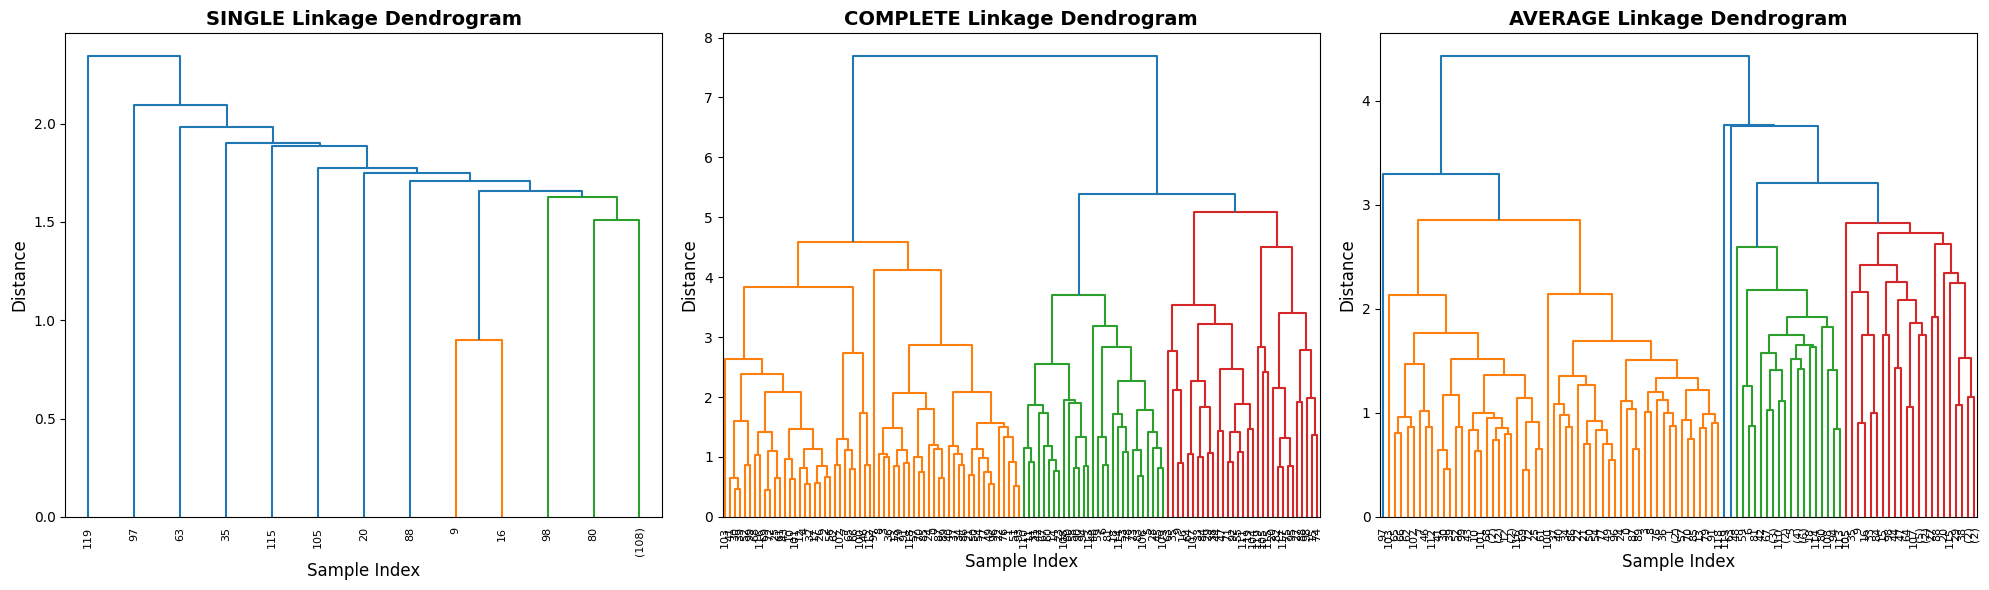

🌳 Dendrograms created successfully!
💡 The height of branches shows the distance between clusters.


In [15]:
# Create dendrograms for all linkage methods
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, method in enumerate(linkage_methods):
    # Create dendrogram
    dendrogram(
        linkage_matrices[method],
        ax=axes[i],
        truncate_mode='level',
        p=10,
        leaf_rotation=90,
        leaf_font_size=8
    )
    
    axes[i].set_title(f'{method.upper()} Linkage Dendrogram', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Sample Index', fontsize=12)
    axes[i].set_ylabel('Distance', fontsize=12)

plt.tight_layout()
plt.show()

print("🌳 Dendrograms created successfully!")
print("💡 The height of branches shows the distance between clusters.")

## 5. Compare Linkage Methods

📊 Linkage Methods Comparison:


,Linkage_Method,Silhouette_Score
0,single,-0.0206
1,complete,0.3369
2,average,0.3141



🏆 Best Linkage Method: COMPLETE
🎯 Best Silhouette Score: 0.3369


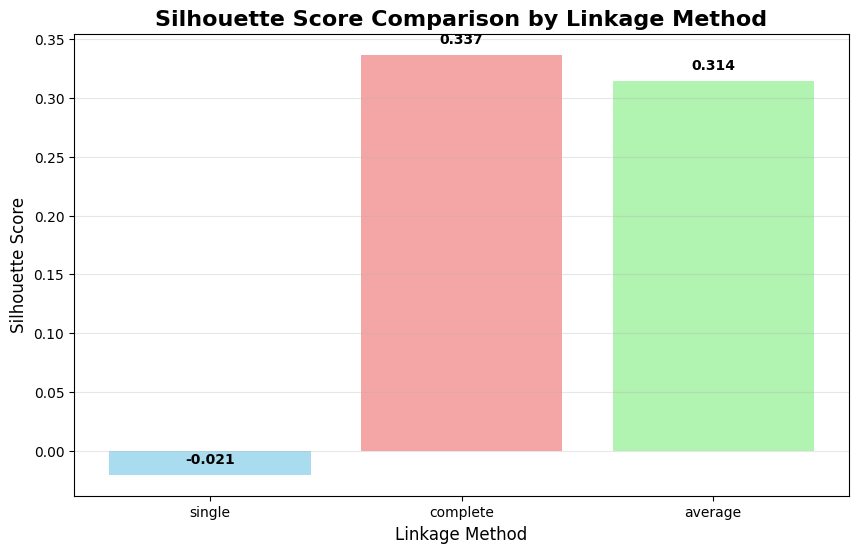

In [16]:
# Compare performance of different linkage methods
comparison_df = pd.DataFrame({
    'Linkage_Method': linkage_methods,
    'Silhouette_Score': [clustering_results[method]['silhouette_score'] for method in linkage_methods]
})

print("📊 Linkage Methods Comparison:")
display(comparison_df.round(4))

# Find best method
best_method = comparison_df.loc[comparison_df['Silhouette_Score'].idxmax(), 'Linkage_Method']
best_score = comparison_df['Silhouette_Score'].max()

print(f"\n🏆 Best Linkage Method: {best_method.upper()}")
print(f"🎯 Best Silhouette Score: {best_score:.4f}")

# Visualize comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Linkage_Method'], comparison_df['Silhouette_Score'], 
               color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.7)

for bar, score in zip(bars, comparison_df['Silhouette_Score']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', fontweight='bold')

plt.title('Silhouette Score Comparison by Linkage Method', fontsize=16, fontweight='bold')
plt.xlabel('Linkage Method', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

## 6. Cluster Visualization

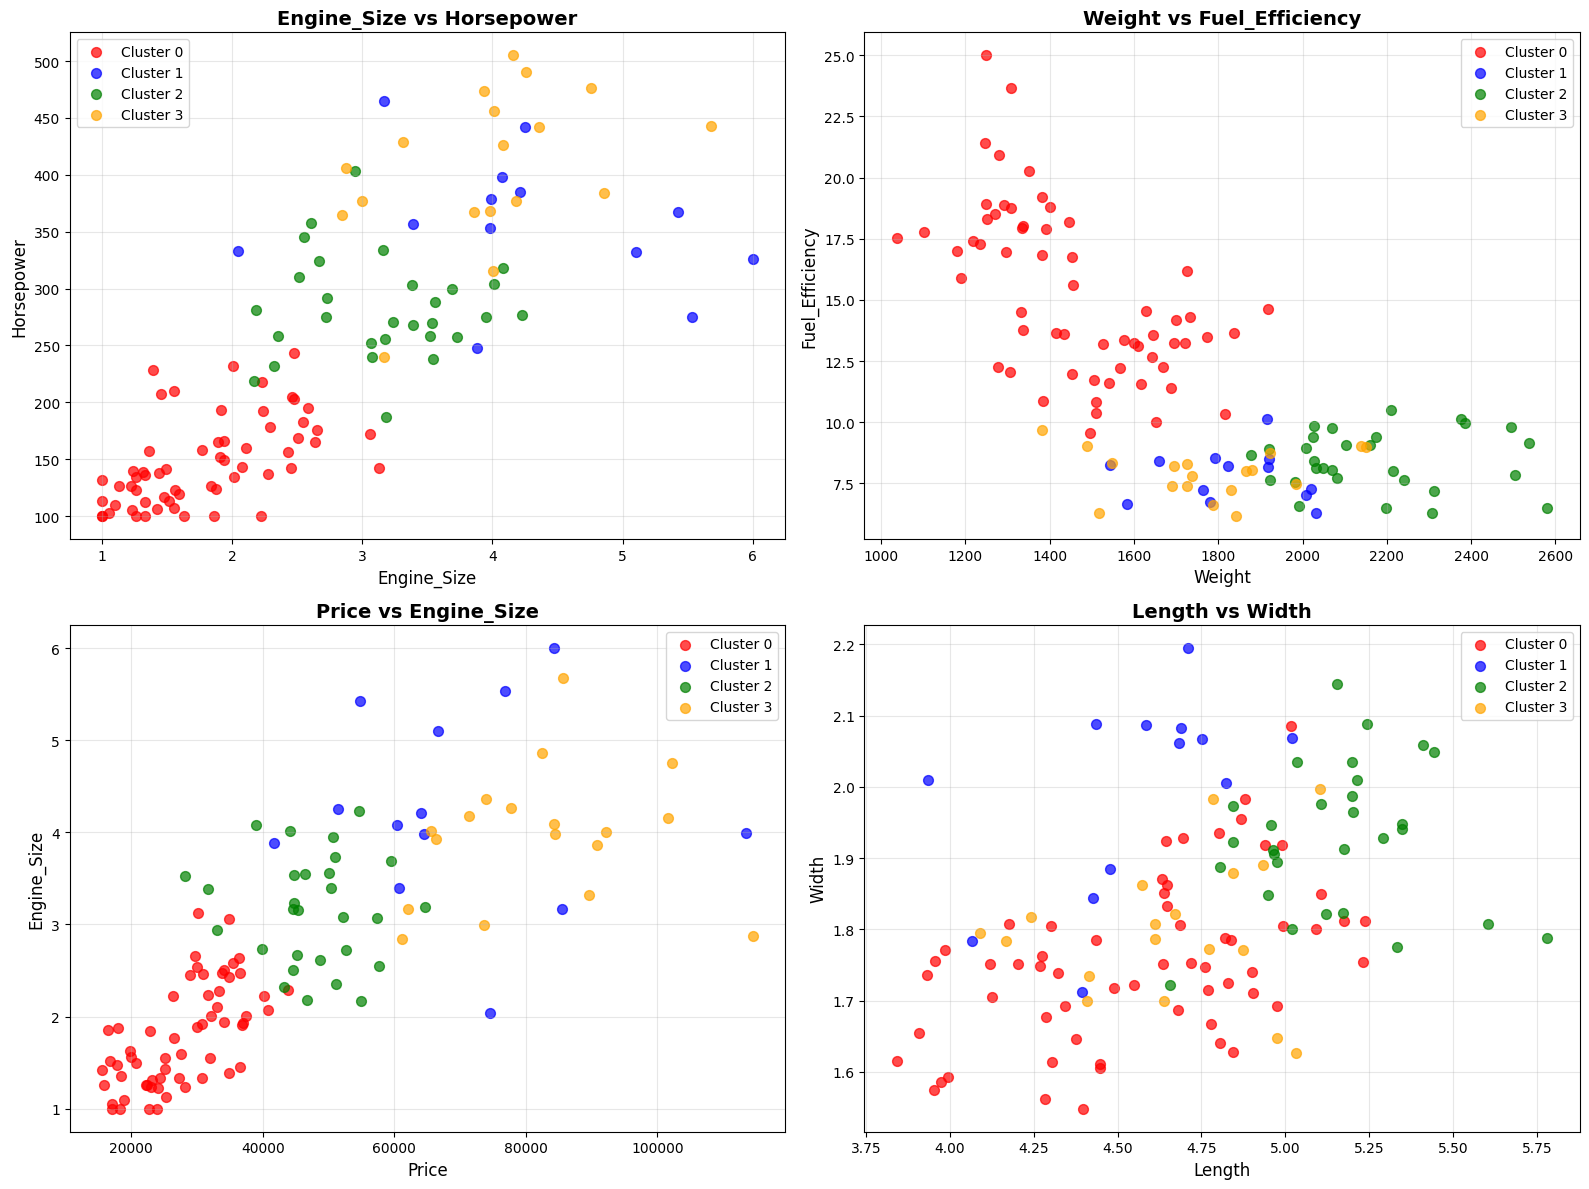

🎨 Cluster visualizations complete!


In [17]:
# Use best method for visualization
best_labels = clustering_results[best_method]['labels']
df['Cluster'] = best_labels

# Visualize clusters using different feature pairs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
colors = ['red', 'blue', 'green', 'orange']

feature_pairs = [
    ('Engine_Size', 'Horsepower'),
    ('Weight', 'Fuel_Efficiency'),
    ('Price', 'Engine_Size'),
    ('Length', 'Width')
]

for idx, (feat1, feat2) in enumerate(feature_pairs):
    ax = axes[idx//2, idx%2]
    
    for cluster in range(n_clusters):
        cluster_data = df[df['Cluster'] == cluster]
        ax.scatter(cluster_data[feat1], cluster_data[feat2], 
                  c=colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=50)
    
    ax.set_xlabel(feat1, fontsize=12)
    ax.set_ylabel(feat2, fontsize=12)
    ax.set_title(f'{feat1} vs {feat2}', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎨 Cluster visualizations complete!")

## 7. Vehicle Group Analysis

In [18]:
# Analyze vehicle groups
print("🚗 VEHICLE GROUP ANALYSIS")
print("=" * 40)

vehicle_group_names = {}

for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    
    avg_engine = cluster_data['Engine_Size'].mean()
    avg_hp = cluster_data['Horsepower'].mean()
    avg_weight = cluster_data['Weight'].mean()
    avg_fuel = cluster_data['Fuel_Efficiency'].mean()
    avg_price = cluster_data['Price'].mean()
    
    print(f"\n🏷️ CLUSTER {cluster} ({len(cluster_data)} vehicles):")
    print(f"  🔧 Engine Size: {avg_engine:.1f}L")
    print(f"  ⚡ Horsepower: {avg_hp:.0f} HP")
    print(f"  ⚖️ Weight: {avg_weight:.0f} kg")
    print(f"  ⛽ Fuel Efficiency: {avg_fuel:.1f} km/L")
    print(f"  💰 Price: ${avg_price:,.0f}")
    
    # Assign vehicle type
    if avg_weight > 2000 and avg_engine > 2.8:
        vehicle_type = "🚙 SUVs (Large, Powerful)"
    elif avg_engine < 1.8 and avg_weight < 1500 and avg_fuel > 15:
        vehicle_type = "🚗 Compact Cars (Small, Efficient)"
    elif avg_hp > 350 and avg_price > 60000:
        vehicle_type = "🏎️ Luxury/Sports Cars (High Performance)"
    else:
        vehicle_type = "🚘 Mid-size Sedans (Balanced)"
    
    vehicle_group_names[cluster] = vehicle_type
    print(f"  🎯 Vehicle Type: {vehicle_type}")

df['Vehicle_Type'] = df['Cluster'].map(vehicle_group_names)

print(f"\n📊 Vehicle Type Distribution:")
type_counts = df['Vehicle_Type'].value_counts()
for vtype, count in type_counts.items():
    print(f"  {vtype}: {count} vehicles")

🚗 VEHICLE GROUP ANALYSIS

🏷️ CLUSTER 0 (60 vehicles):
  🔧 Engine Size: 1.8L
  ⚡ Horsepower: 147 HP
  ⚖️ Weight: 1458 kg
  ⛽ Fuel Efficiency: 15.2 km/L
  💰 Price: $27,690
  🎯 Vehicle Type: 🚗 Compact Cars (Small, Efficient)

🏷️ CLUSTER 1 (13 vehicles):
  🔧 Engine Size: 4.2L
  ⚡ Horsepower: 358 HP
  ⚖️ Weight: 1827 kg
  ⛽ Fuel Efficiency: 7.8 km/L
  💰 Price: $69,120
  🎯 Vehicle Type: 🏎️ Luxury/Sports Cars (High Performance)

🏷️ CLUSTER 2 (29 vehicles):
  🔧 Engine Size: 3.1L
  ⚡ Horsepower: 283 HP
  ⚖️ Weight: 2168 kg
  ⛽ Fuel Efficiency: 8.4 km/L
  💰 Price: $47,479
  🎯 Vehicle Type: 🚙 SUVs (Large, Powerful)

🏷️ CLUSTER 3 (18 vehicles):
  🔧 Engine Size: 4.0L
  ⚡ Horsepower: 408 HP
  ⚖️ Weight: 1773 kg
  ⛽ Fuel Efficiency: 7.9 km/L
  💰 Price: $82,190
  🎯 Vehicle Type: 🏎️ Luxury/Sports Cars (High Performance)

📊 Vehicle Type Distribution:
  🚗 Compact Cars (Small, Efficient): 60 vehicles
  🏎️ Luxury/Sports Cars (High Performance): 31 vehicles
  🚙 SUVs (Large, Powerful): 29 vehicles


## 8. Divisive Clustering Concept

In [19]:
# Explain divisive clustering concept
print("🌳 DIVISIVE CLUSTERING CONCEPT")
print("=" * 40)

print("💡 Agglomerative vs Divisive:")
print("\n🔼 AGGLOMERATIVE (Bottom-up):")
print("  1. Start with each point as its own cluster")
print("  2. Merge closest clusters iteratively")
print("  3. Continue until desired number of clusters")
print("  ✅ What we implemented above")

print("\n🔽 DIVISIVE (Top-down):")
print("  1. Start with all points in one cluster")
print("  2. Split clusters recursively")
print("  3. Continue until desired number of clusters")
print("  ⚠️ More computationally expensive")

print("\n🔄 Simulated Divisive Steps:")
print(f"  Step 1: All {len(df)} vehicles in 1 cluster")
print(f"  Step 2: Split into 2 clusters based on size/weight")
print(f"  Step 3: Split each into 2 more (total 4 clusters)")
print(f"  Result: {n_clusters} final vehicle groups")

print("\n✅ Divisive clustering concept explained!")

🌳 DIVISIVE CLUSTERING CONCEPT
💡 Agglomerative vs Divisive:

🔼 AGGLOMERATIVE (Bottom-up):
  1. Start with each point as its own cluster
  2. Merge closest clusters iteratively
  3. Continue until desired number of clusters
  ✅ What we implemented above

🔽 DIVISIVE (Top-down):
  1. Start with all points in one cluster
  2. Split clusters recursively
  3. Continue until desired number of clusters
  ⚠️ More computationally expensive

🔄 Simulated Divisive Steps:
  Step 1: All 120 vehicles in 1 cluster
  Step 2: Split into 2 clusters based on size/weight
  Step 3: Split each into 2 more (total 4 clusters)
  Result: 4 final vehicle groups

✅ Divisive clustering concept explained!


## 9. Summary & Insights

In [20]:
# Final summary
print("🎯 HIERARCHICAL CLUSTERING SUMMARY")
print("=" * 45)

print(f"\n📊 CLUSTERING RESULTS:")
print(f"  • Total Vehicles: {len(df)}")
print(f"  • Number of Clusters: {n_clusters}")
print(f"  • Best Linkage Method: {best_method.upper()}")
print(f"  • Best Silhouette Score: {best_score:.4f}")

print(f"\n🚗 VEHICLE GROUPS IDENTIFIED:")
for cluster, vtype in vehicle_group_names.items():
    count = len(df[df['Cluster'] == cluster])
    print(f"  • {vtype}: {count} vehicles")


print("\n✅ Hierarchical Vehicle Clustering Complete!")

🎯 HIERARCHICAL CLUSTERING SUMMARY

📊 CLUSTERING RESULTS:
  • Total Vehicles: 120
  • Number of Clusters: 4
  • Best Linkage Method: COMPLETE
  • Best Silhouette Score: 0.3369

🚗 VEHICLE GROUPS IDENTIFIED:
  • 🚗 Compact Cars (Small, Efficient): 60 vehicles
  • 🏎️ Luxury/Sports Cars (High Performance): 13 vehicles
  • 🚙 SUVs (Large, Powerful): 29 vehicles
  • 🏎️ Luxury/Sports Cars (High Performance): 18 vehicles

✅ Hierarchical Vehicle Clustering Complete!
